In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.sample(30)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
5345,0.83,0.85,4,201,2,1,0,0,support,low
6715,0.68,0.67,3,228,2,0,0,0,RandD,medium
828,0.59,1.00,2,160,5,0,1,0,product_mng,low
13444,0.70,0.85,4,142,2,0,0,0,support,low
4541,0.74,0.94,3,286,6,0,0,1,technical,medium
8330,0.51,0.54,4,166,4,1,0,0,sales,low
14560,0.40,0.46,2,149,3,0,1,0,technical,medium
5169,0.51,0.58,4,140,3,0,0,0,technical,high
6021,0.56,0.63,4,271,2,1,0,0,product_mng,high
9729,0.47,0.41,2,140,3,0,0,0,hr,medium


In [3]:
# check for missing values

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

There are no missing values in the data

In [4]:
# dtypes of the columns in df

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [5]:
# make the numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

print('The numerical columns in the dataframe are:',list(num_cols),sep='\n' )
print()
print('The categorical column in the dataframe are:',list(cat_cols),sep='\n')
print()

The numerical columns in the dataframe are:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']

The categorical column in the dataframe are:
['Department', 'salary']



In [6]:
# check for duplicate rows

print('The total number of duplicate rows are:',df.duplicated().sum())
print('The percentage of duplicated rows are',np.round(df.duplicated().mean()*100,decimals=2))

The total number of duplicate rows are: 3008
The percentage of duplicated rows are 20.05


- Around 1/5th of the data is duplicated.

In [7]:
# Number of rows in data
df.shape[0]

14999

In [8]:
# number of rows in data after removing duplicates

df.drop_duplicates(inplace=True)

df.shape[0]

11991

In [9]:
# check if any duplicates are still present

df.duplicated().sum()

0

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
df.rename({'average_montly_hours':'average_monthly_hours'},axis=1,inplace=True)

### Statistical summary

In [12]:
# statistical summary of numerical data

df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Satisfaction level
- The mean satisfaction level is 0.6 whereas the minimum is very low around 0.09.
- The range is satisfaction level in the lower 25 percentile is high as compared to others.
- Some of the employee have satisfaction level of 1.

**Make a departmental satisfaction level column where satisfaction level are on per department basis**. 

#### Last_evaluation
- Currently not aware what this evaluation is about. Have to do more analysis to come up to a conclusion for this column.

#### Number_project
- Do not know if this tells about the total number of projects or the no. of projects done concurrently.
- The median value is 4 projects. The lower 50 percentile works on 4 projects at max and the uppaer ranges till 7.
- On an average around 4 projects are done by the employees.

#### Average monthly hours
- The mean monthly hours is around 200.
- The minimum is 96 which is less than even the half of the average. (These employees are highly underworked).
- Some employees in the company are working around 250 hours. The above 25 percent are those category.(These are highly overworked).
- There are some employees who are even working more than 300 hours in the company. (These are pushed to their limit). Averaging around 12 hours in a working month of 25 days.

#### time_spend_company
- The average time spend in the company is around 3.3 years.
- The minimum time spend is 2 years. (No freshers currently in the company)
- Around half of the employees are fairly new and have spend around 3 or less years in the company.
- The above 25% are the old employees and have spent around 4 or more years in the company.
- There are some employees that have 10 years of experience in the company. (**Maybe joined from the very start of the company or would be at high positions in the comapny.**).

#### Work_accident:
Around 15.5% of employees have faced work related accidents in the company.

#### Left
Around 16.6% of the employees have left the company (**Might be having lower satisfaction level or faced work related accidents**).

#### Promotion_last_5years:
Around 16.5% of the employees have got promotion in last_5_years. (**Might be experienced employees or have good performance and might have performed good in the last evaluation and been considered for promotion**)


**Note** - The `'Left'`, `'Work accident'`, `'Promotion_last_5_years'` are all categorical column having binary categories.

In [13]:
# statistical summary of categorical columns

df.describe(include='object')

,Department,salary
count,11991,11991
unique,10,3
top,sales,low
freq,3239,5740


- The `Department` column has 10 unique values.
- The `Salary` column has 3 unique values.
- Large number of the employees (almost half) have low salary.
- Around 3200 employees are from the sales department. Almost 1/3th of the employees are from the sales department.

## EDA

### Satisfaction level

In [14]:
# make all column names lowercase

df.columns = df.columns.str.lower()

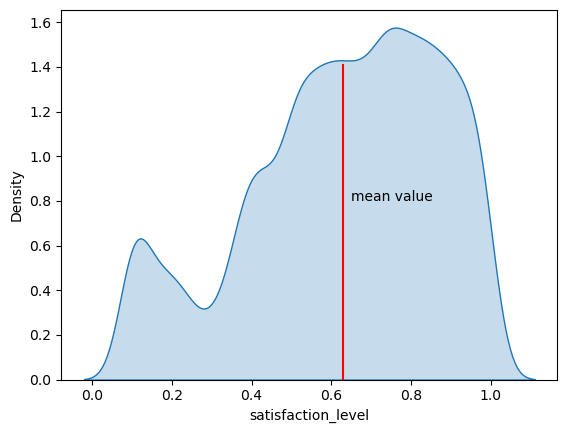

In [15]:
# plot a distribution plot of satisfaction level

sns.kdeplot(x='satisfaction_level',data=df,fill=True)
plt.axvline(x = df['satisfaction_level'].mean(),ymax=0.85,color='red')
plt.annotate('mean value',xy=(0.65,0.8),color='k')
plt.show()

- The satisfaction level among employees is bimodal in nature.
- One peak is around the lower satisfaction level.
- The other group averages out at a much larger ranges of satisfaction levels.

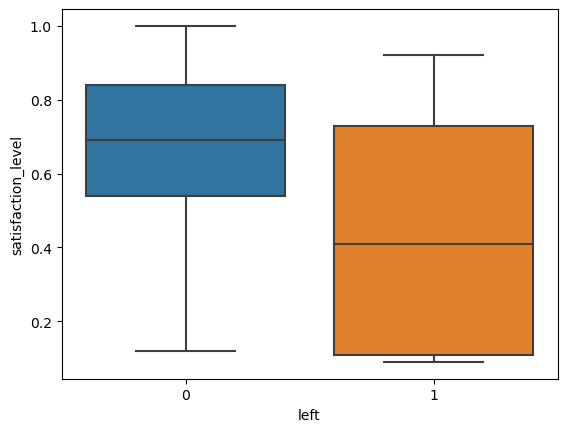

In [16]:
sns.boxplot(x='left',y='satisfaction_level',data=df)
plt.show()

In [17]:
from matplotlib.lines import Line2D

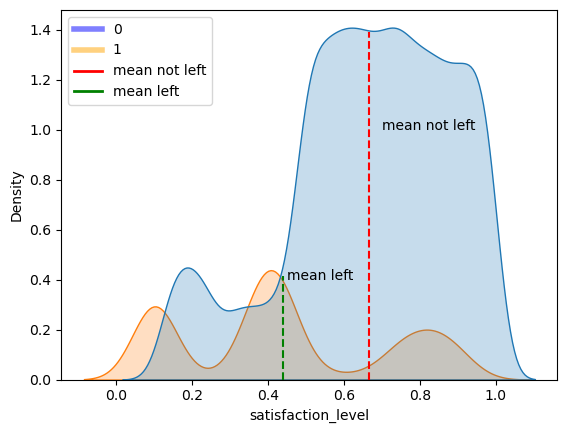

In [18]:
# plot a distribution plot between satisfaction_level and left
mean_left = df[df['left'] == 1]['satisfaction_level'].mean()
mean_not_left = df[df['left'] == 0]['satisfaction_level'].mean()

# plot the distribution curve
sns.kdeplot(x='satisfaction_level',data=df,fill=True,hue='left')

# plot line for mean values
plt.axvline(x = mean_not_left,ymax=0.94,color='red',linestyle='--')
plt.axvline(x=mean_left,ymax=0.28,color='green',linestyle='--')

# make the legends of every element in the graph
legends = [Line2D([0],[0],color='blue',label='0',linewidth=4,alpha=0.5),
           Line2D([0],[0],color='orange',label='1',linewidth=4,alpha=0.5),
           Line2D([0],[0],color='red',label='mean not left',linewidth=2),
           Line2D([0],[0],color='green',label='mean left',linewidth=2)]

# show the legend and annotate the lines
plt.legend(handles=legends,loc='upper left')
plt.text(0.7,1,'mean not left')
plt.text(0.45,0.4,'mean left')
plt.show()

The distribution is **trimodal** for the employees who have left.    
The distribution is **bimodal** for the employees who have not left.

- The satisfaction level of employees that have not left on an average more than those who have left.
- Employees with less,average and high satisfaction levels have left, but the distribution is more for the average satisfaction level employees.
- This shows that satisfaction level is indeed playing a role in churn prediction.

In [19]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

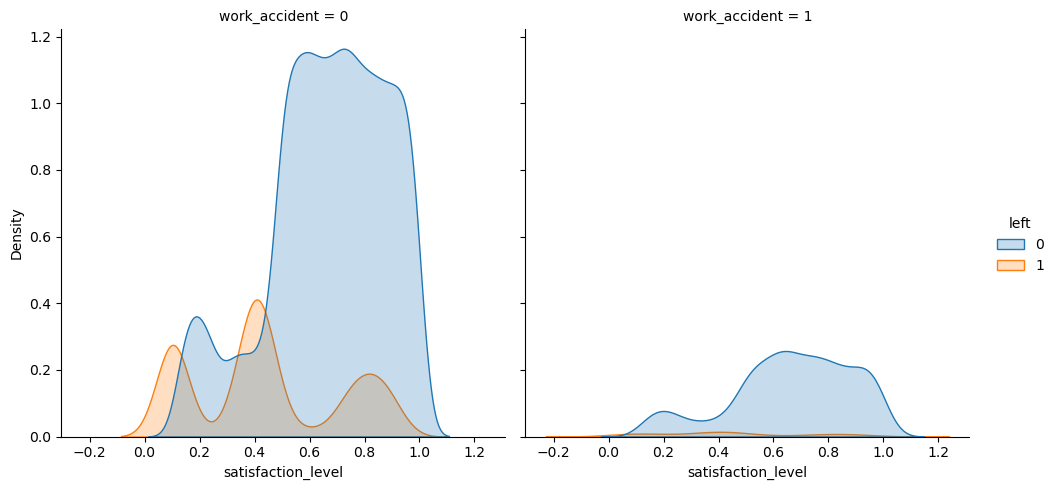

In [20]:
# distribution of satisfaction level with work related accidents

sns.displot(data=df,x='satisfaction_level',hue='left',col='work_accident',kind='kde',fill=True)
plt.show()

- the work accident has no impact on the left employees and also on the satisfaction level.

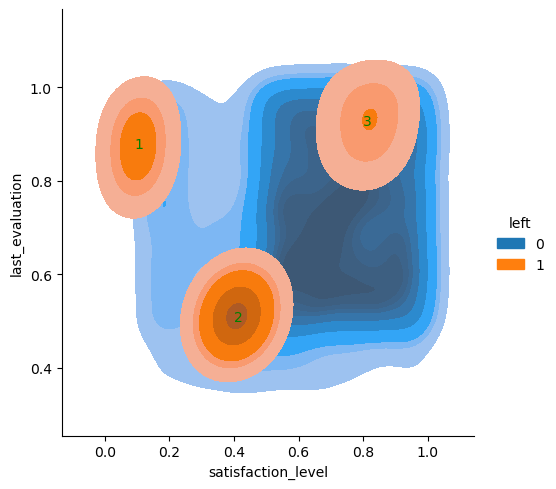

In [21]:
# distribution of satisfaction level with last evaluation

sns.displot(data=df,x='satisfaction_level',y='last_evaluation',hue='left',kind='kde',fill=True)
plt.text(0.09,0.87,'1',color='green',fontsize='medium')
plt.text(0.8,0.92,'3',color='green',fontsize='medium')
plt.text(0.4,0.5,'2',color='green',fontsize='medium')

plt.show()

- The Data shows formation of 3 clusters for the employees that have left

1. **Cluster 1** - Those employees that have a very low satisaction level but have scored high points at the last evaluation.
2. **Cluster 2** - those employees that have average satisfaction level and also scored less than average in the last evaluation.
3. **Cluster 3** - This is a less denser cluster with high values of satisfaction level and also high last_evaluation scores.

In [22]:
df['department'].nunique()

10

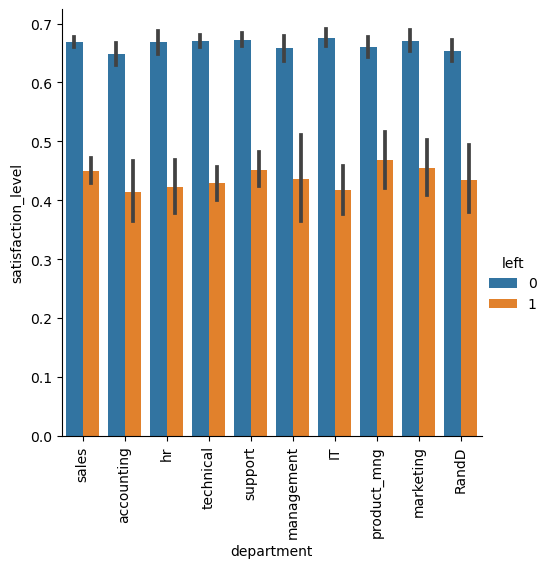

In [23]:
# Satisfaction levels based on different departments

sns.catplot(x='department',y='satisfaction_level',data=df,hue='left',kind='bar',estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

- The mean satisfaction level of employees not left and those who have left is almost similar among different departments.

In [24]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

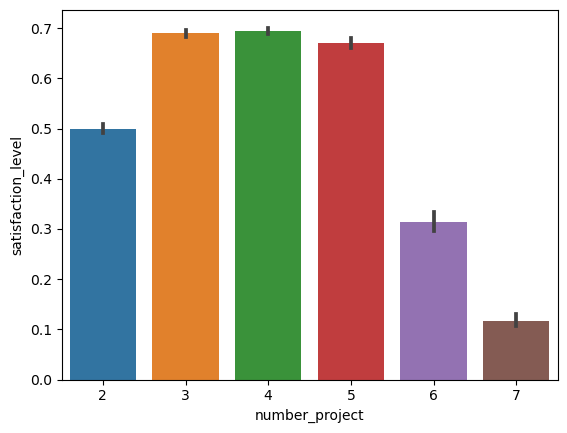

In [25]:
# mean satisfaction level with number of project

sns.barplot(x='number_project',y='satisfaction_level',data=df)
plt.show()

- The bar chart clearly shows that as the number of projects increases, it increases the stress and might result in reduced satisfaction levels. 
- The mean satisfaction level of employees is somewhat similar when they are given projects in the range of 3 to 5 projects. 

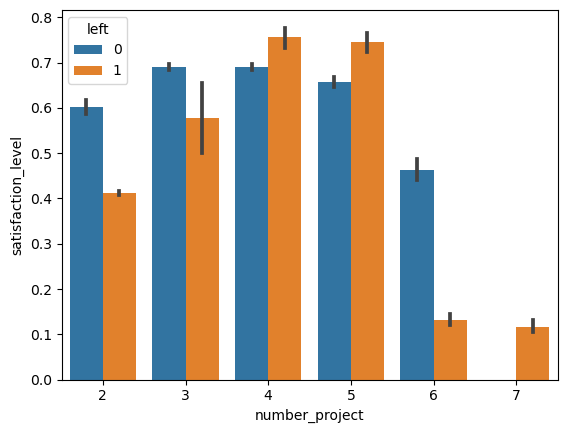

In [26]:
# mean satisfaction level of employees left or not left with number of project

sns.barplot(x='number_project',y='satisfaction_level',data=df,hue='left')
plt.show()

The mean satisfaction level; of employees that have left is generally lower for the given number of projects.
- Employees given 7 projects have all left the company.
- The mean satisfaction level of employees doing 4 or 5 projects is higher for those left the company as compared to those who have not left.
- This means that other factors are responsible for the churn and not only satisfaction level is responsible.(**Employees with high satisfaction levels can also leave the company**)

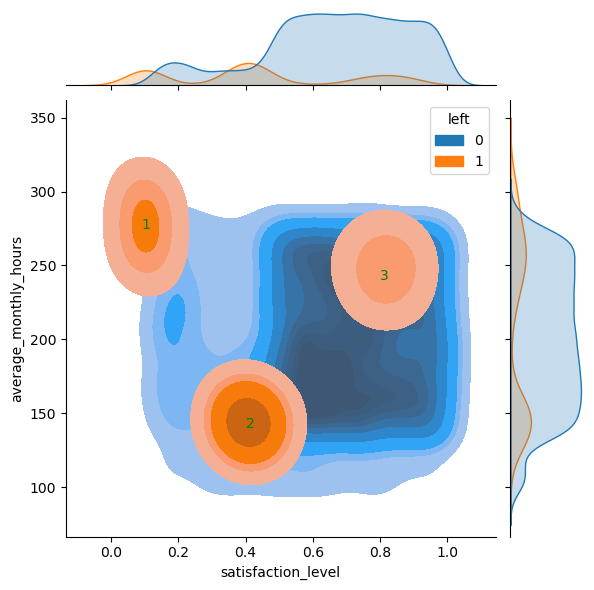

In [27]:
# satisfaction level with number of working hours per month

sns.jointplot(data=df,x='satisfaction_level',y='average_monthly_hours',kind='kde',hue='left',fill=True)
plt.text(0.09,275,'1',color='green',fontsize='medium')
plt.text(0.8,240,'3',color='green',fontsize='medium')
plt.text(0.4,140,'2',color='green',fontsize='medium')
plt.show()

The graph shows 3 clusters:    
**Cluster1** - These kind of employees have inverse relationship where they have low satisfaction levels might be due to very long avg monthly hours.     
**Cluster2** - These employees have seem to have left maybe because they are not given enough work or they might be having low satisfaction level and do not take up work that often.   
**Cluster3** - These employees have left instead of having high satisfaction levels and they work more than avg. Work hours might be the reason for leaving.   
 
- It seems that avg monthly work hours has a relationship with the employees those are leaving along with other factors.

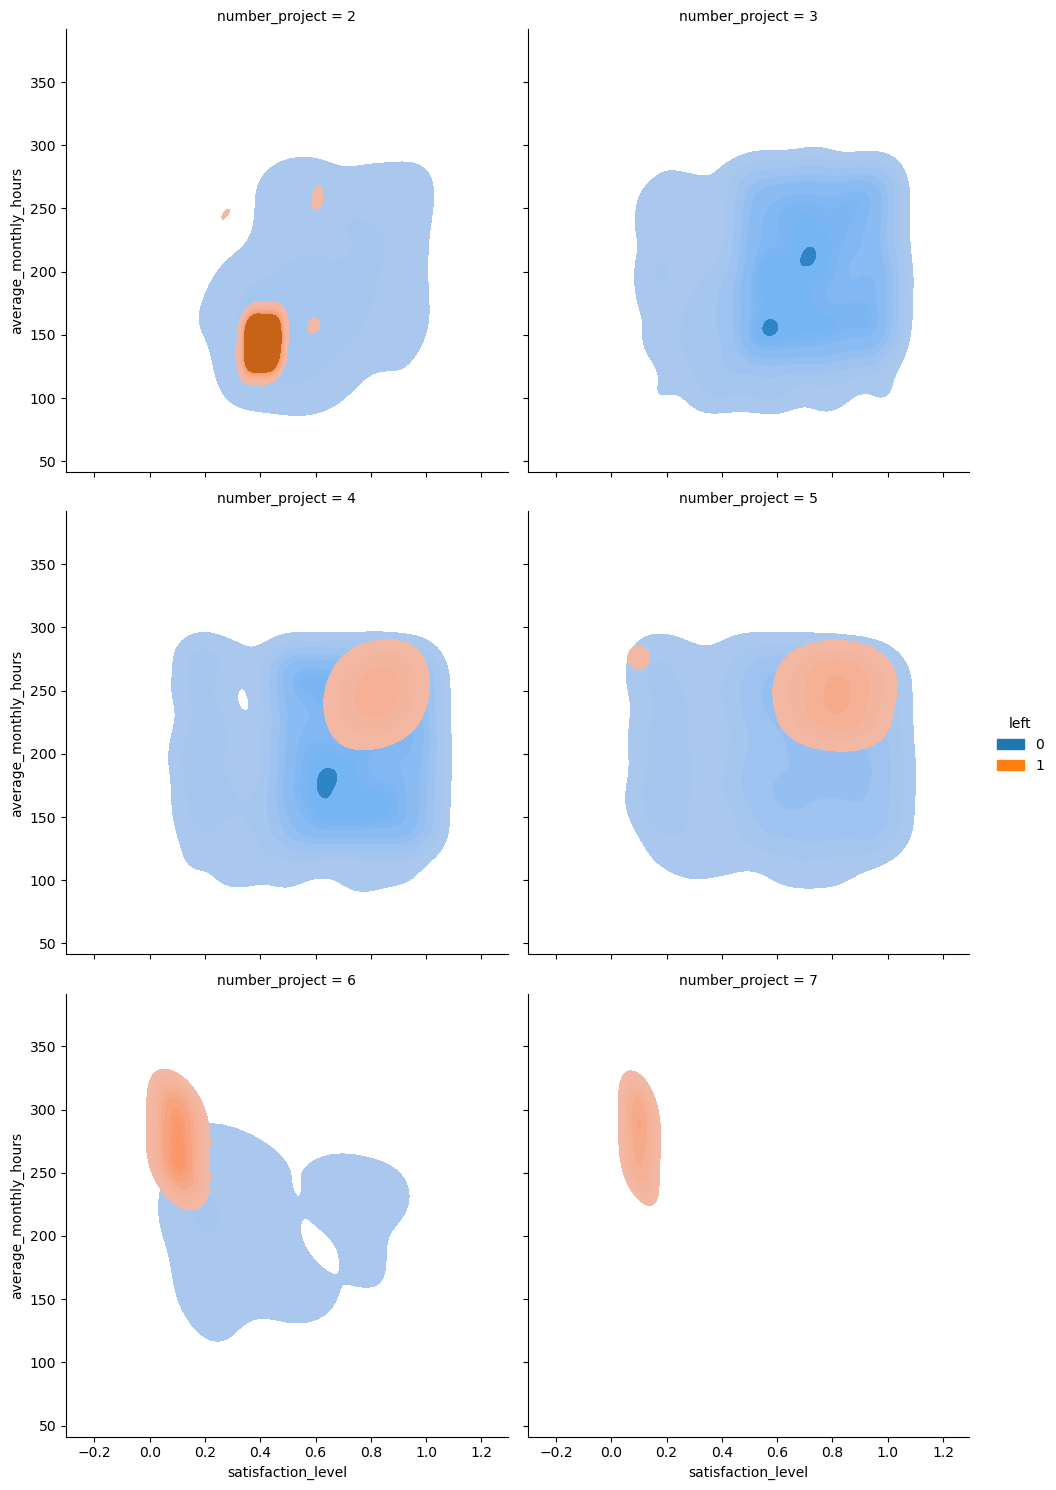

In [28]:
# multivariate relationship between satisfaction level, avg monthly hours and the number of projects

sns.displot(data=df,x='satisfaction_level',y='average_monthly_hours',kind='kde',hue='left',
            fill=True,col='number_project',col_wrap=2)
plt.show()

**Conclusions**:

1. Employees that have low satisfaction level and working on less projects, are leaving the company. (They might not be interested in the work they are doing or might be having low salary).
2. Very less employees have actually left who are working on 3 projects.(optimum number)
3. People leaving when working on 4 or 5 projects have a high satisfaction level, but their avg monthly working hours are high and thats why they are leaving.
4. People working on 6 projects have very low satisfaction level and higher avg working hours. They are leaving because they are assumed to be overwoked.
5. All employees have actually left that are working on 7 projects. (**7 projects can be considered as a possible tipping point for churn)** 
    - Having very low satisfaction and very high avg monthly working hours

In [29]:
df[['number_project','average_monthly_hours','satisfaction_level']].corr()

,number_project,average_monthly_hours,satisfaction_level
number_project,1.000000,0.331516,-0.133246
average_monthly_hours,0.331516,1.000000,-0.006252
satisfaction_level,-0.133246,-0.006252,1.000000


In [30]:
x = pd.crosstab(index=df['number_project'],columns=df['left'],margins=True,margins_name='Sum')

x['Percentage of employees left'] = (x[1] / x['Sum']) * 100 

x

left,0,1,Sum,Percentage of employees left
number_project,,,,
2,725,857,1582,54.171934
3,3482,38,3520,1.079545
4,3448,237,3685,6.431479
5,1890,343,2233,15.360502
6,455,371,826,44.915254
7,0,145,145,100.000000
Sum,10000,1991,11991,16.604120


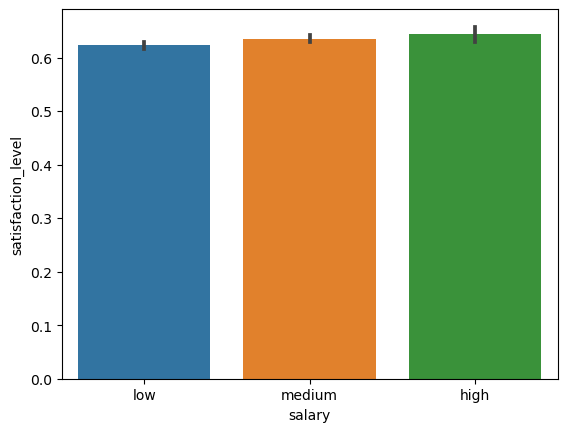

In [31]:
# relation of satisfaction level with salary

sns.barplot(x='salary',y='satisfaction_level',data=df,estimator='mean')
plt.show()

- The mean satisfaction level for all the salary categories is almost same.
- The salary it seems does not have any impact on the mean satisfaction level of the employees.

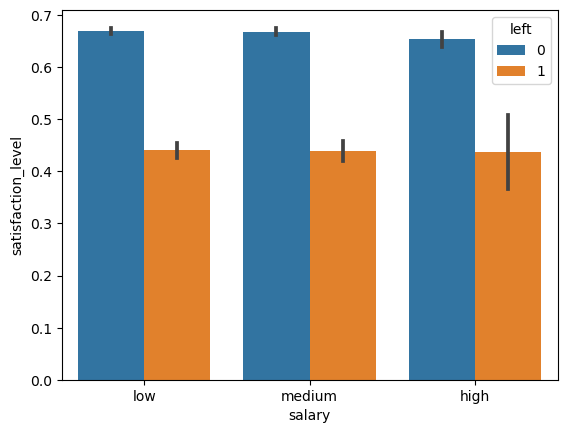

In [32]:
# relation of satisfaction level with salary

sns.barplot(x='salary',y='satisfaction_level',data=df,estimator='mean',hue='left')
plt.show()

In [33]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

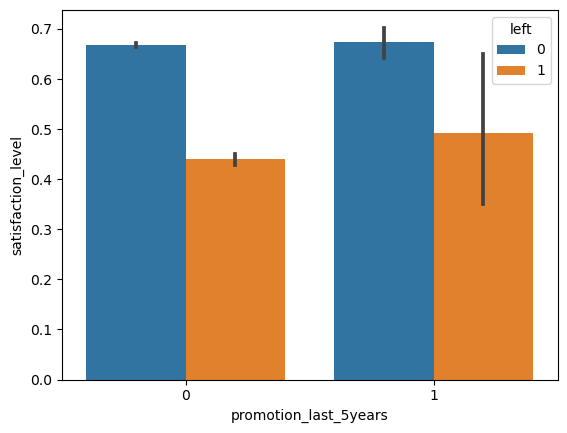

In [34]:
# relation with promotion in last 5 years with satisfaction level

sns.barplot(x='promotion_last_5years',y='satisfaction_level',data=df,hue='left')
plt.show()

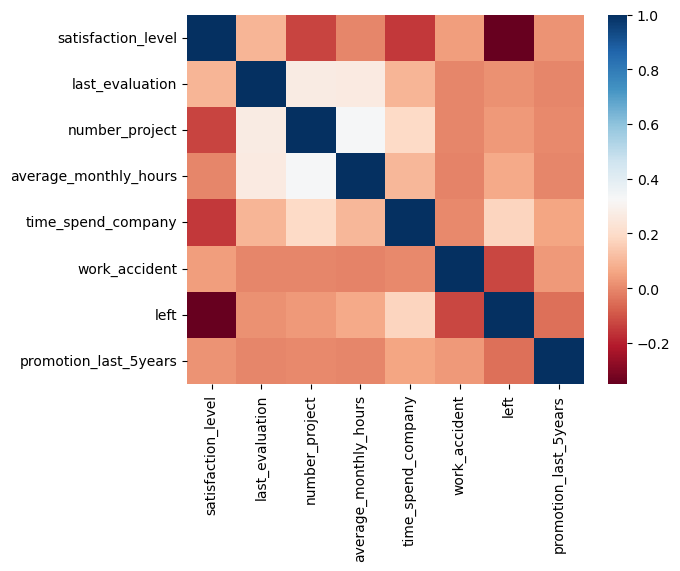

In [35]:
sns.heatmap(df.corr(numeric_only=True),cmap='RdBu')
plt.show()

## Last evaluation

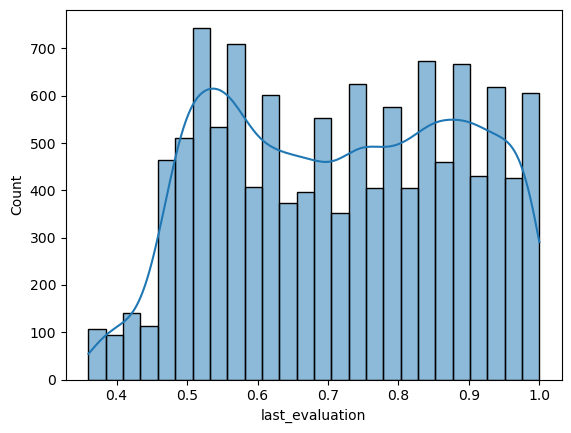

In [36]:
# distribution of the last evaluation column

sns.histplot(x='last_evaluation',data=df,kde=True)
plt.show()

- The distribution of the last evaluation column seems fairly normal

In [37]:
# skewness of last evaluation column
df['last_evaluation'].skew()

-0.031686075200590205

<AxesSubplot: xlabel='promotion_last_5years', ylabel='last_evaluation'>

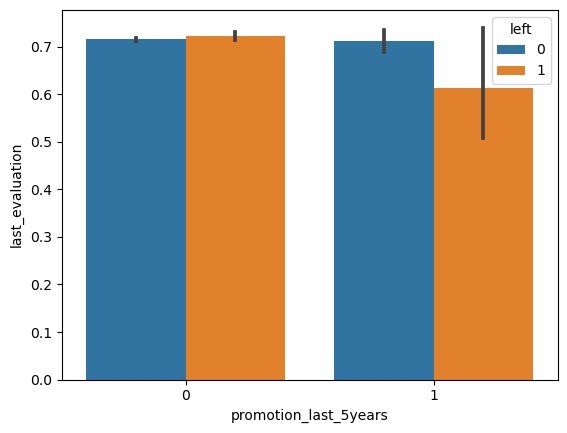

In [38]:
# relation with promotion in last 5 years with last evaluation

sns.barplot(x='promotion_last_5years',y='last_evaluation',data=df,hue='left')

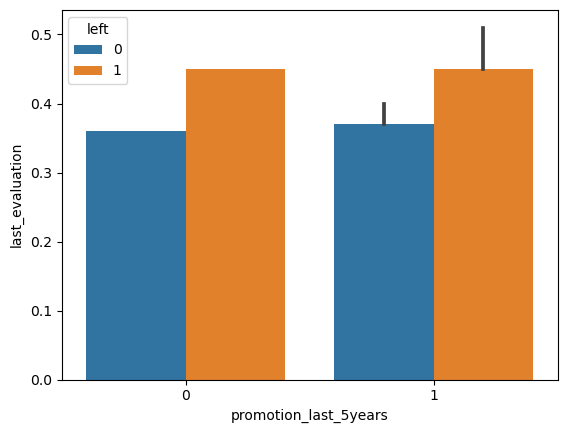

In [39]:
# relation with promotion in last 5 years with last evaluation

sns.barplot(x='promotion_last_5years',y='last_evaluation',data=df,hue='left',estimator='min')
plt.show()

The employees have the almost same min evaluation_level which is related to being getting promoted or not.
This is not showing any relationship.

In [40]:
df[['promotion_last_5years','last_evaluation']].corr()

,promotion_last_5years,last_evaluation
promotion_last_5years,1.000000,-0.007206
last_evaluation,-0.007206,1.000000


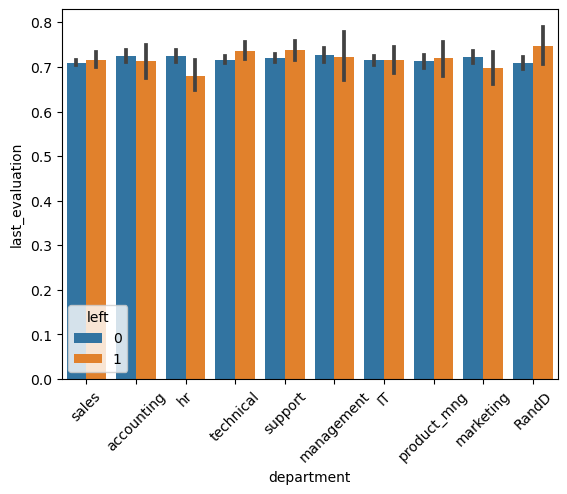

In [41]:
# relation with department types with last evaluation

sns.barplot(x='department',y='last_evaluation',data=df,hue='left')
plt.xticks(rotation=45)
plt.show()

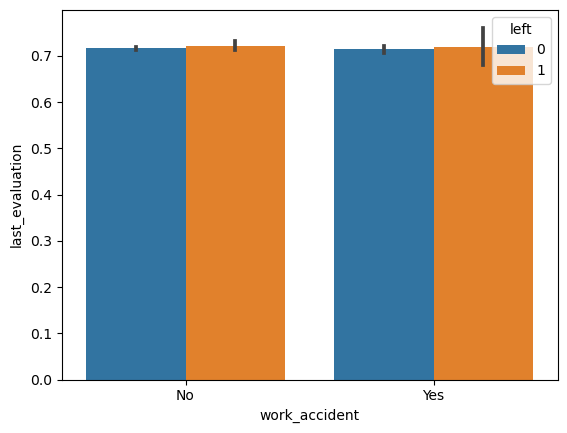

In [42]:
# relation with work accident with last evaluation

sns.barplot(x='work_accident',y='last_evaluation',data=df,hue='left')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.show()

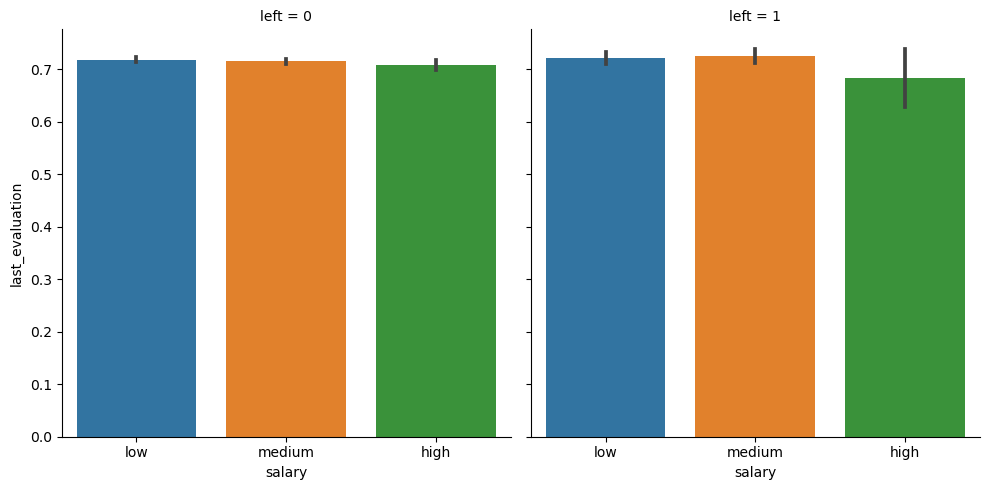

In [43]:
# last evaluation wrt to salary

sns.catplot(x='salary',y='last_evaluation',data=df,col='left',kind='bar')
plt.show()

The last evaluation and the departments does not show any relationship on which employees have churned and which have not.

In [44]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [45]:
df[['last_evaluation','average_monthly_hours']].corr()

,last_evaluation,average_monthly_hours
last_evaluation,1.000000,0.264678
average_monthly_hours,0.264678,1.000000


- The ratio of employees that have left The HR and the accounting department is greater than that of the RnD and the management department.    
- 8 out of 10 departments shows percentage of people left is in the range of 16 to almost 19%.

## Number of projects

In [46]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

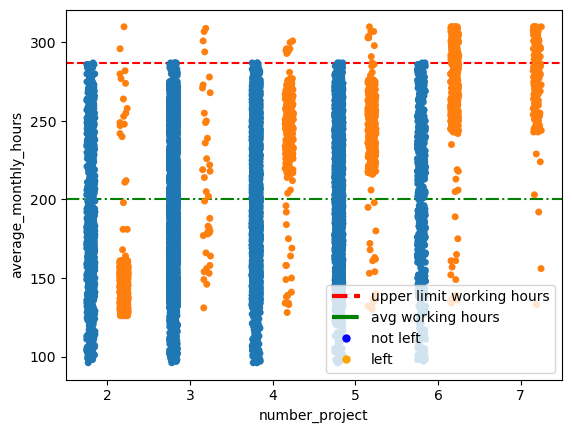

In [47]:
# create plot
sns.stripplot(x='number_project',y='average_monthly_hours',data=df,hue='left',dodge=True)

# create line for max value of working hours for not left empoloyees
plt.axhline(y=df.groupby('left')['average_monthly_hours'].max()[0]+0.1,color='red',linestyle='--')

# create a horizontal line for mean of monthly working hours
plt.axhline(y=df['average_monthly_hours'].mean(),color='green',linestyle='-.')

# creating legend labels

label = [Line2D([0],[0],linewidth=3,color='red',linestyle='--',label='upper limit working hours'),
        Line2D([0],[0],linewidth=3,color='green',linestyle='-.',label='avg working hours'),
        Line2D([0],[0],marker='o',markersize=5,markerfacecolor='blue',label='not left',linewidth=0,markeredgecolor='blue'),           
        Line2D([0],[0],marker='o',markersize=5,markerfacecolor='orange',label='left',linewidth=0,markeredgecolor='orange') 
        ]
plt.legend(handles=label)

plt.show()

- All employees having working hours greater than 287 in a month have almost left the company
- Many employees those who are working for less than the mean hours monthly and working on only 2 projects have also left the company.

In [48]:
# max working hours for those who left or not left

df.groupby('left')['average_monthly_hours'].max()

left
0    287
1    310
Name: average_monthly_hours, dtype: int64

<Figure size 2000x1000 with 0 Axes>

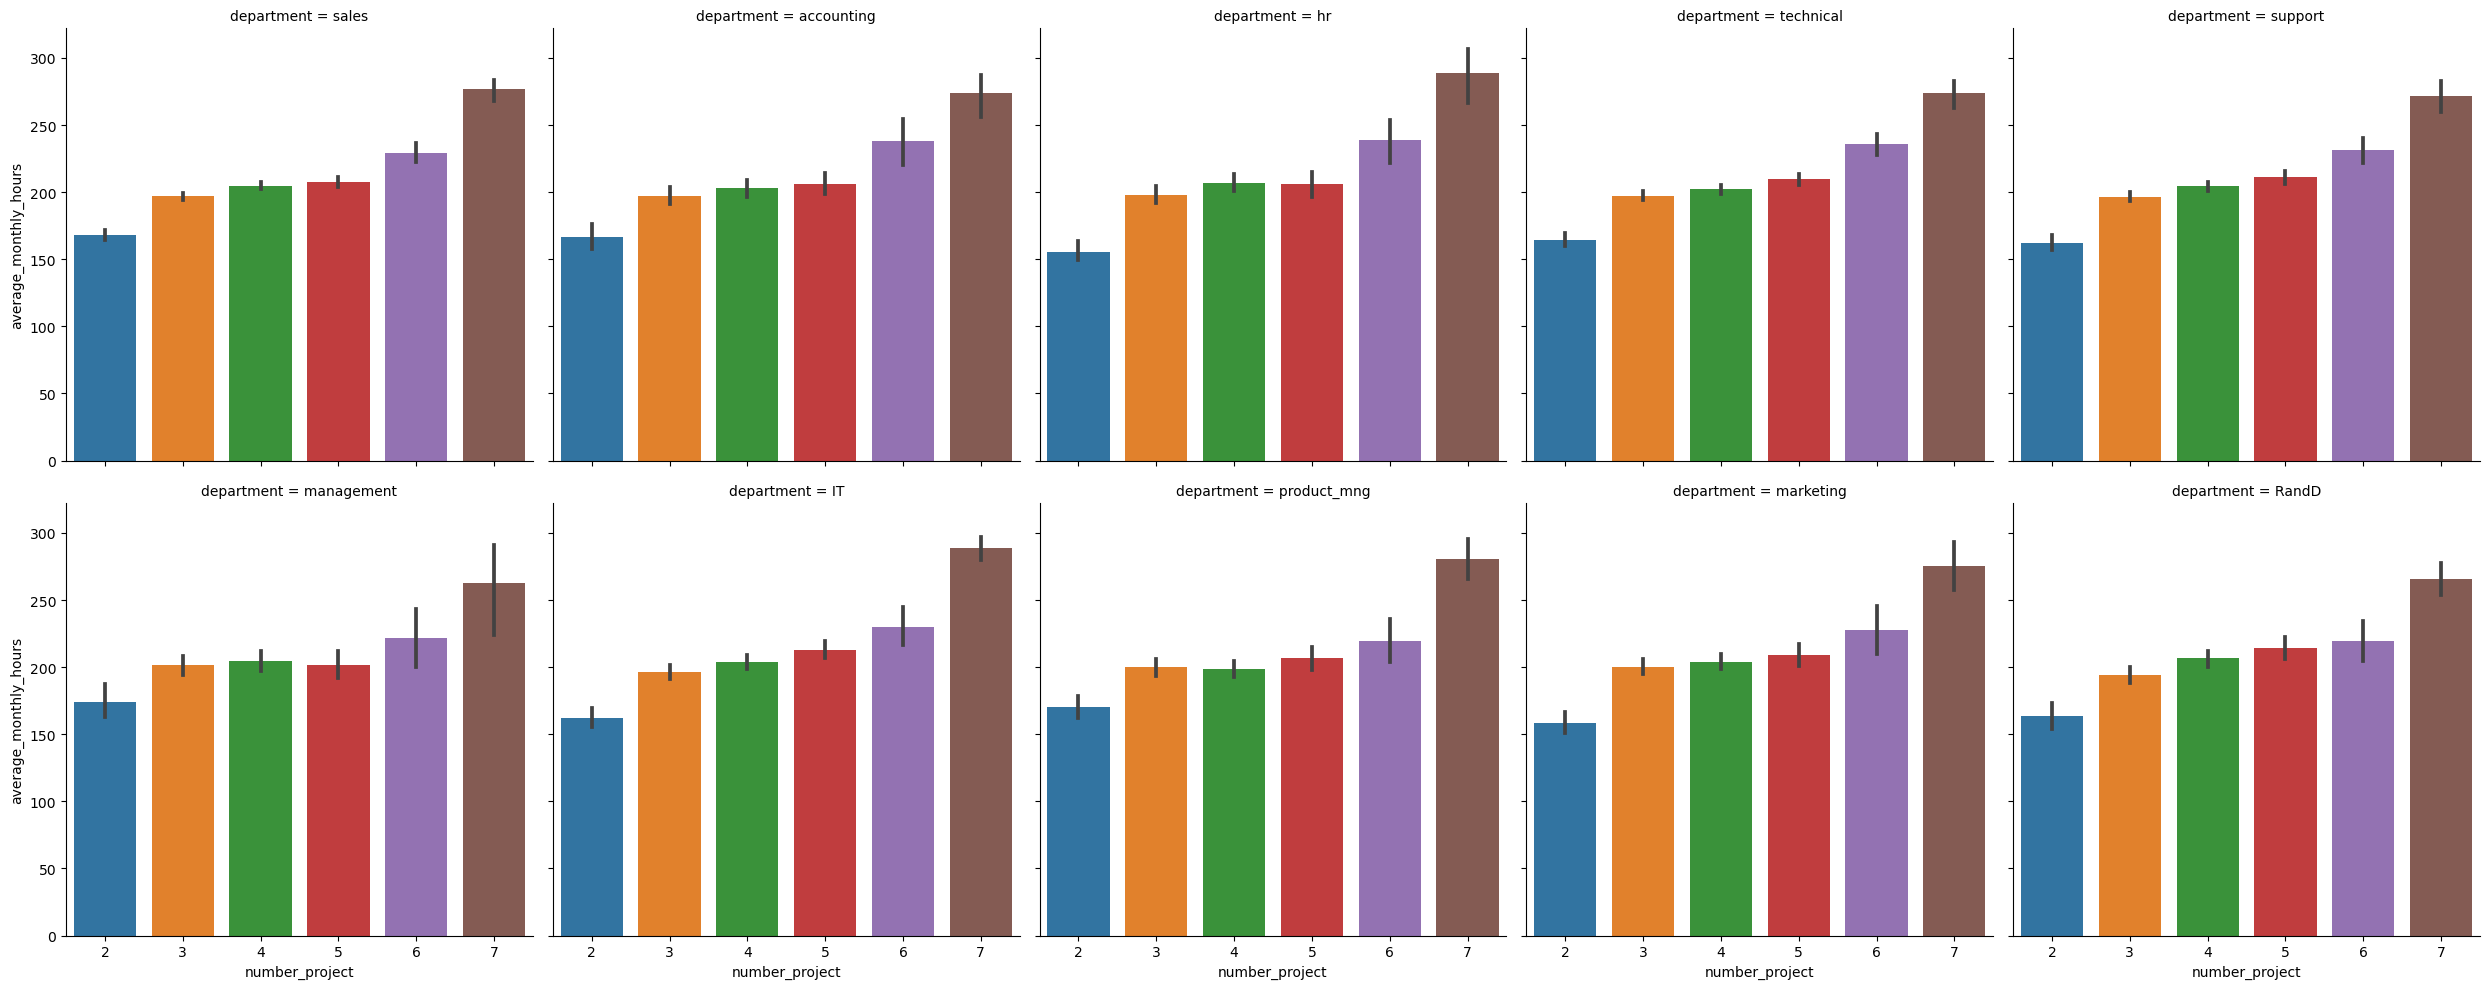

In [49]:
# realationship between average monthly hours and number of projects per department basis 

plt.figure(figsize=(20,10))
sns.catplot(x='number_project',y='average_monthly_hours',data=df,dodge=True,col='department',col_wrap=5,kind='bar')
plt.show()

- The average monthly working hours follows an upward trend as the number of projects increases. This is almost same for all the departments.
- These observations follows the convention that as the numbers of projects increases, so do the average monthly working hours also increases.

In [50]:
df[['average_monthly_hours','number_project']].corr()

,average_monthly_hours,number_project
average_monthly_hours,1.000000,0.331516
number_project,0.331516,1.000000


## Time spend in company

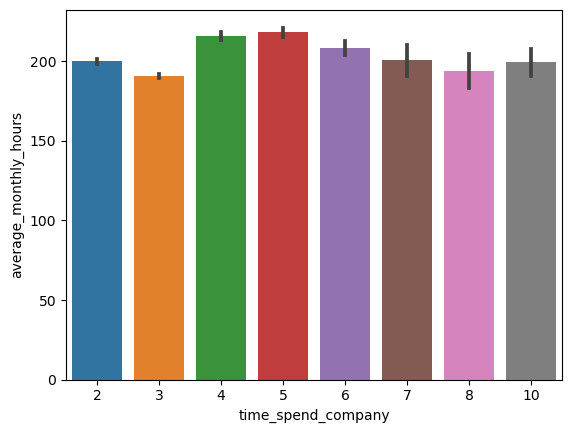

In [51]:
# relationship between time spend in company and avg monthly working hours

sns.barplot(x='time_spend_company',y='average_monthly_hours',data=df)
plt.show()

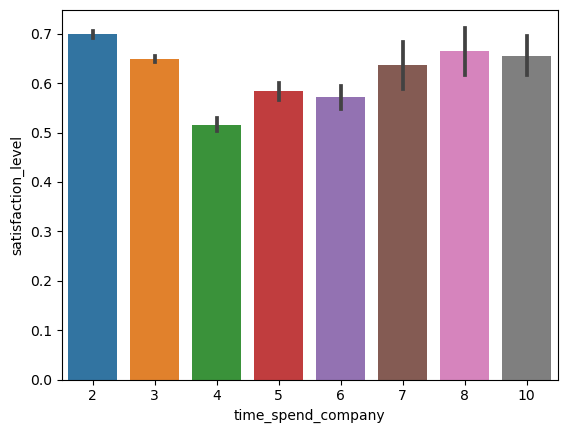

In [52]:
# realtion between time spend and satisfaction_level

sns.barplot(x='time_spend_company',y='satisfaction_level',data=df)
plt.show()

<AxesSubplot: xlabel='time_spend_company', ylabel='count'>

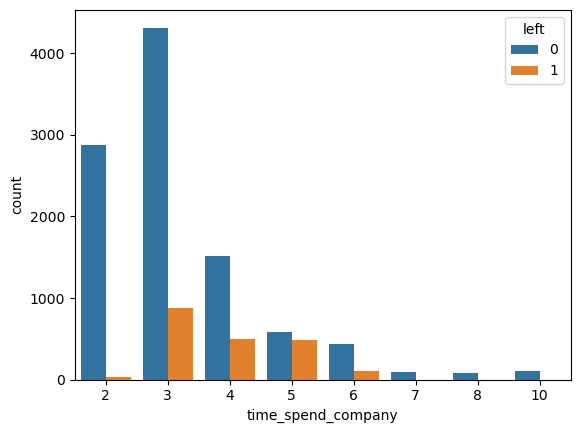

In [53]:
sns.countplot(x='time_spend_company',data=df,hue='left')

In [54]:
# percentage of employees left in each department based on the number of projects

x = pd.crosstab(index=df['department'],columns=df['number_project'],values=df['left'],aggfunc='sum',normalize='columns').applymap(lambda x: x*100)
x

number_project,2,3,4,5,6,7
department,,,,,,
IT,8.168028,5.263158,4.641350,9.037901,8.625337,8.275862
RandD,3.733956,2.631579,4.641350,5.830904,3.773585,4.827586
accounting,5.250875,5.263158,6.329114,4.373178,6.469003,5.517241
hr,6.767795,7.894737,7.172996,2.915452,4.851752,4.827586
management,2.450408,2.631579,2.953586,1.749271,2.695418,4.827586
marketing,6.417736,5.263158,5.907173,4.956268,4.043127,6.206897
product_mng,5.950992,0.000000,4.641350,6.997085,4.312668,5.517241
sales,29.288215,23.684211,30.801688,25.655977,25.336927,24.137931
support,14.585764,21.052632,13.924051,18.367347,17.250674,13.103448


In [55]:
# count of employees who left in different departments

pd.crosstab(index=df['department'],columns=df['left']).sort_values(1,ascending=False)

left,0,1
department,,
sales,2689,550
technical,1854,390
support,1509,312
IT,818,158
hr,488,113
marketing,561,112
product_mng,576,110
accounting,512,109
RandD,609,85


The maximum number of employees have left from the sales department.    
The minimum number have left from the management department.

In [56]:
# calculate the percentage value of left per department

df.groupby('department')['left'].mean().sort_values(ascending=False) * 100

department
hr             18.801997
accounting     17.552335
technical      17.379679
support        17.133443
sales          16.980550
marketing      16.641902
IT             16.188525
product_mng    16.034985
RandD          12.247839
management     11.926606
Name: left, dtype: float64